In [58]:
import indigo
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdRGroupDecomposition

from IPython.core.display import Image, display
from indigo.renderer import IndigoRenderer

import pandas as pd
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import rdDepictor
from rdkit.Chem import PandasTools

from rdkit.Chem import rdRGroupDecomposition
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.warning')
import rdkit
print(rdkit.__version__)

from IPython.display import display, Image
from IPython.display import HTML, display

2019.09.2


In [59]:
def groups_to_df(groups, mols, include_core=False, redraw_sidechains=False):
    """ add the molecule to the dataframe
    """
    cols = ['Mol'] + list(groups.keys())
    if redraw_sidechains:
        for k, vl in groups.items():
            if k == 'Core':
                continue
            for i, v in enumerate(vl):
                vl[i] = Chem.RemoveHs(v)
                rdDepictor.Compute2DCoords(vl[i])

    if not include_core:
        cols.remove('Core')
        del groups['Core']
    groups['Mol'] = mols
    frame = pd.DataFrame(groups, columns=cols)
    PandasTools.ChangeMoleculeRendering(frame)
    return frame

def draw_images(images_paths):
    image_template = "<td><img src='{path}'></td>"
    line_template = "<table><tr>{images}</tr></table>"
    imgs = ""
    for i in images_paths:
        imgs += image_template.format(path=i)
    display(HTML(line_template.format(images=imgs)))

In [78]:
scaffold_smiles = "c1c([*:2])c([*:3])ccn1"
structures = 'c1c(F)cccn1 c1c(Cl)c(C)ccn1 c1c(O)cccn1 c1c(F)c(C)ccn1 c1cc(Cl)c(F)cn1'.split()

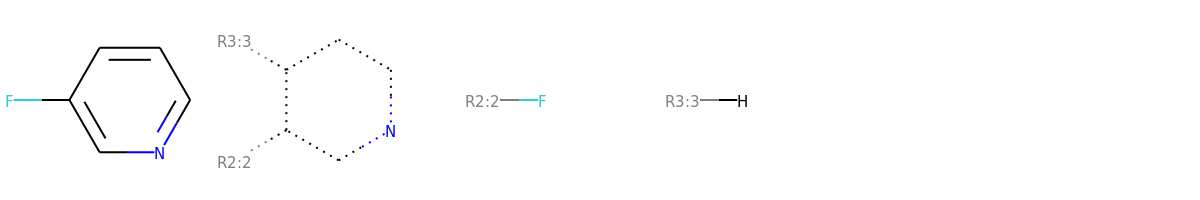

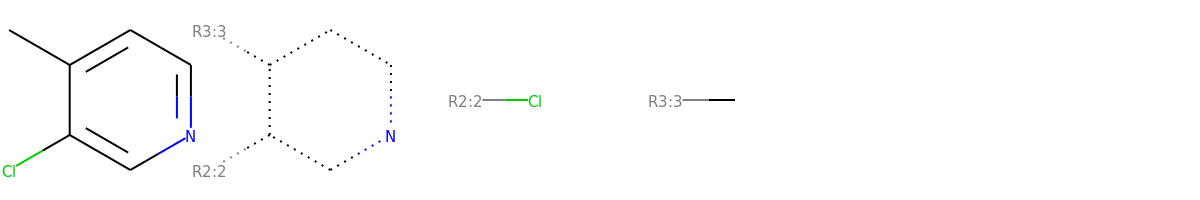

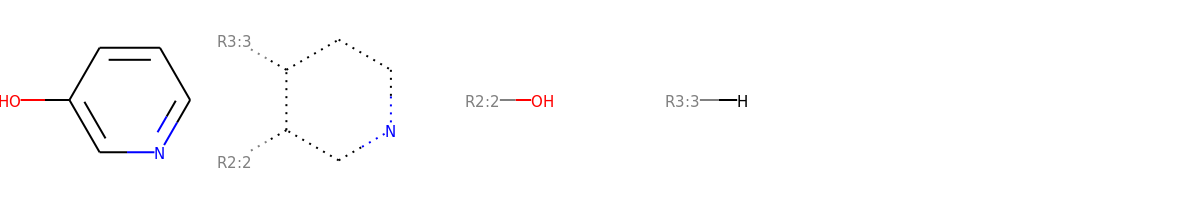

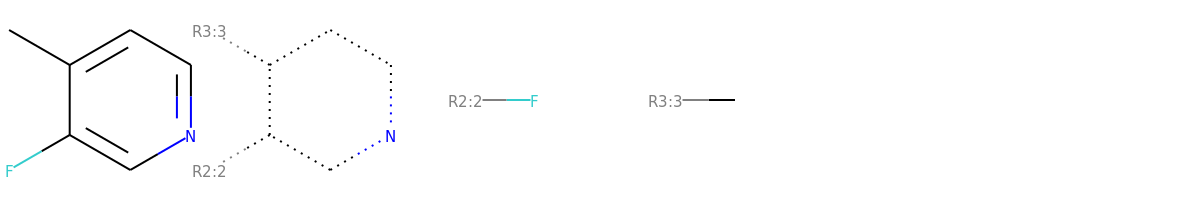

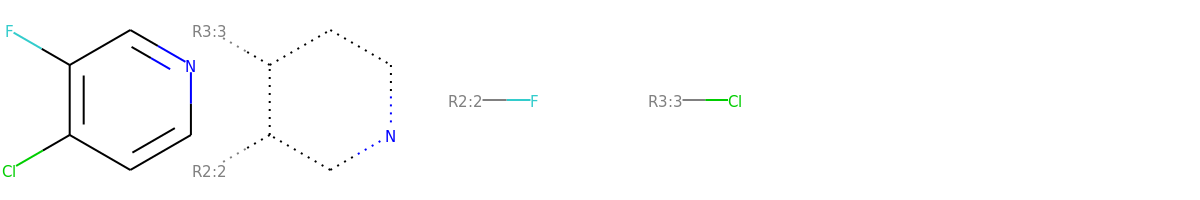

In [81]:
params = rdRGroupDecomposition.RGroupDecompositionParameters()
params.onlyMatchAtRGroups = True

mol = [Chem.MolFromSmiles(m) for m in structures]
scaffold = Chem.MolFromSmarts(scaffold_smiles)

with open('sc_mol', 'w') as f:
    f.write(Chem.MolToMolBlock(scaffold))

groups, unmatched = rdRGroupDecomposition.RGroupDecompose([scaffold],
                                                          mol,
                                                          #options=params,
                                                          asSmiles=False,
                                                          asRows=False)

for i in range(len(groups['Core'])):
    
    output = [mol[i]]
    for key in groups.keys():
        output.append(groups[key][i])

    
    display(Draw.MolsToGridImage(output, molsPerRow=6))


In [82]:
indigo_instance = indigo.Indigo()


scaffold = indigo_instance.loadQueryMolecule(scaffold_smiles)
#scaffold.saveMolfile("sc_test")
#scaffold = indigo_instance.loadQueryMoleculeFromFile("sc_mol")

renderer = IndigoRenderer(indigo_instance)
renderer.renderToFile(scaffold, "mols/scaff.png")


deco = indigo_instance.createDecomposer(scaffold)


for smiles in structures:
    m = indigo_instance.loadMolecule(smiles)
    
    
    mol_path = 'mols/mol_{}.png'.format(smiles)
    renderer.renderToFile(m, mol_path)
    images = [mol_path, "mols/scaff.png"]
        
    item = deco.decomposeMolecule(m)
    
    for q_match in item.iterateDecompositions():

        rg_mol = q_match.decomposedMoleculeWithRGroups()
        
        renderer.renderToFile(rg_mol, 'mols/rg_{}.png'.format(smiles))
        images.append('mols/rg_{}.png'.format(smiles))
        
        deco.addDecomposition(q_match)
        
    draw_images(images)


,


,,,


,


,,,


,,,


In [ ]:
Почему